# ADS-505 - Final Project - Team 5
## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Customer Personality Analysis Dataset

_________



**Data Dictionary**

Attributes

**People**

Year_Birth: Customer's birth year  
Education: Customer's education level  
Marital_Status: Customer's marital status  
Income: Customer's yearly household income  
Kidhome: Number of children in customer's household  
Teenhome: Number of teenagers in customer's household  
Dt_Customer: Date of customer's enrollment with the company  
Recency: Number of days since customer's last purchase  
Complain: 1 if customer complained in the last 2 years, 0 otherwise  

**Products**

MntWines: Amount spent on wine in last 2 years  
MntFruits: Amount spent on fruits in last 2 years  
MntMeatProducts: Amount spent on meat in last 2 years  
MntFishProducts: Amount spent on fish in last 2 years  
MntSweetProducts: Amount spent on sweets in last 2 years  
MntGoldProds: Amount spent on gold in last 2 years  

**Promotion**  

NumDealsPurchases: Number of purchases made with a discount  
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

**Place**  

NumWebPurchases: Number of purchases made through the company’s web site  
NumCatalogPurchases: Number of purchases made using a catalogue  
NumStorePurchases: Number of purchases made directly in stores  
NumWebVisitsMonth: Number of visits to company’s web site in the last month  


In [2]:
cpa_df = pd.read_csv('https://usd-mads-projects.s3.us-west-1.amazonaws.com/ADS505/marketing_campaign.csv', sep='\t')
cpa_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
cpa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
cpa_df.set_index(['ID'], inplace=True)

##Checking Null Values


In [5]:
cpa_df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Only 24 null values on the Income variable, which accounts for 1% missing. The missing values will be resolved using mean imputation.

In [6]:
cpa_df['Income'] = cpa_df['Income'].fillna(cpa_df['Income'].mean())
cpa_df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Year of Birth  
This variable is meaningless in this state, instead converting this to Age will be far more useful.

In [7]:
# As of this project, the year is 2021
cpa_df['Age'] = 2021 - cpa_df['Year_Birth']

# Drop Year_Birth
cpa_df.drop(columns=['Year_Birth'], inplace=True)

##Education Level  

In [8]:
cpa_df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Education is a ordinal. However, the nomenclature required some deciphering. From this link about the 3 cycle educational system http://www.ehea.info/page-three-cycle-system. 2n Cycle is the same as a Master level education. Therefore, 2n Cycle will be combined with Master, and Basic being the lowest tier. Will need to be ordinal encoded in pre-processing

In [9]:
cpa_df['Education'].replace({'2n Cycle': 'Master'}, inplace=True)
cpa_df['Education'].value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

## Marital Status

This variable is categorical and will need to be one-hot encoded

In [10]:
cpa_df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

After view some of the strange values under Marital Status such as Absurd and YOLO. It would be prudent to combine Alone, Absurd, YOLO and Single. This variable will be one-hot encoded in pre-processing


In [11]:
cpa_df['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'}, inplace=True)
cpa_df['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

## Children

The variables Kidhome, Teenhome do not make sense as is. They will be combined into another variable called Children and it will be a sum of the Kidhome + Teenhome variable.

In [12]:
cpa_df['Children'] = cpa_df['Kidhome'] + cpa_df['Teenhome']
# Drop kidhome, teenhome
cpa_df.drop(columns=['Kidhome', 'Teenhome'], inplace=True)
cpa_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'Children'],
      dtype='object')

## Dt_Customer

This variable is the date of customer enrollment. Since the other variables are in terms of past 2 years, we will be converting this data into number of years

In [13]:
# convert to datetime
cpa_df['Dt_Customer'] = pd.to_datetime(cpa_df['Dt_Customer'])
cpa_df['Customer_Years'] = (pd.to_datetime('today') - cpa_df['Dt_Customer']).dt.days / 365
# Drop Dt_Customer
cpa_df.drop(columns=['Dt_Customer'], inplace=True)
cpa_df['Customer_Years'].head()

ID
5524    9.531507
2174    7.213699
4141    8.164384
6182    7.049315
5324    7.750685
Name: Customer_Years, dtype: float64

## Products Spent

The following variables are products that the customer spent in the last 2 years

MntWines: Amount spent on wine in last 2 years.  
MntFruits: Amount spent on fruits in last 2 years.  
MntMeatProducts: Amount spent on meat in last 2 years.  
MntFishProducts: Amount spent on fish in last 2 years.  
MntSweetProducts: Amount spent on sweets in last 2 years.  
MntGoldProds: Amount spent on gold in last 2 years.  

It would be useful to have a variable with the total amount spent in the last 2 years. 


In [14]:
cpa_df['2year_Spend'] = cpa_df['MntWines'] + cpa_df['MntFruits'] + \
                        cpa_df['MntMeatProducts'] + cpa_df['MntFishProducts'] + \
                        cpa_df['MntSweetProducts'] + cpa_df['MntGoldProds']

## Z_CostContact and Z_Revenue

These variables are zero variance (only have one value) and will need to be dropped.

In [15]:
cpa_df['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [16]:
cpa_df['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [17]:
cpa_df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

## Promotion variables.
A variable to track whether a customer responsed to any of the promotional campaigns will be created. A variable to track the number of promotional responses will also be created.

In [18]:
cpa_df['Respond_Any'] = cpa_df[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2', 'Response']].any(axis=1)
cpa_df['Response_Count'] = cpa_df[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2', 'Response']].sum(axis=1)

___________


# Analysis of Demographic Variables

## Education Level

Text(0.5, 1.0, 'Distribution of Education Level')

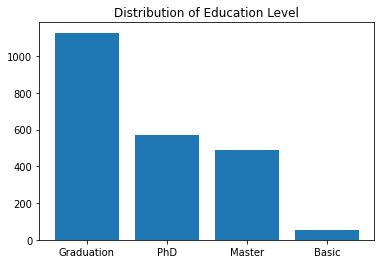

In [19]:
plt.bar(cpa_df['Education'].unique(), cpa_df['Education'].value_counts())
plt.title('Distribution of Education Level')

Overall, the dataset consists of customers that have a high level of education, most have obtained a bachelor's degree or graduate/post graduate degree.

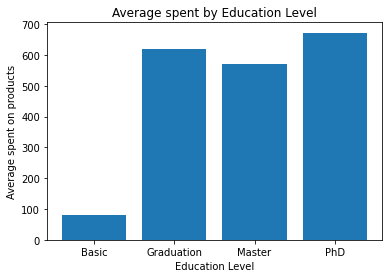

In [20]:
ed_spend_group = cpa_df.groupby(['Education']).mean()

plt.bar(ed_spend_group.index.tolist(), ed_spend_group['2year_Spend'])
plt.xlabel('Education Level')
plt.ylabel('Average spent on products')
plt.title('Average spent by Education Level')
plt.show()

The average spent over a 2 year period is far smaller for customers who did not graduate from college. Those with a bachelor's degree or higher spent more.

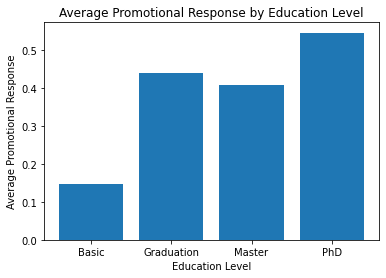

In [21]:
plt.bar(ed_spend_group.index.tolist(), ed_spend_group['Response_Count'])
plt.xlabel('Education Level')
plt.ylabel('Average Promotional Response')
plt.title('Average Promotional Response by Education Level')
plt.show()

Average promotional reponse tends to be higher among PhD level customers and mirrors the 2 year average spent on products.

## By Income

In [22]:
demo_vars = ['Marital_Status', 'Income', 'Age', 'Children']


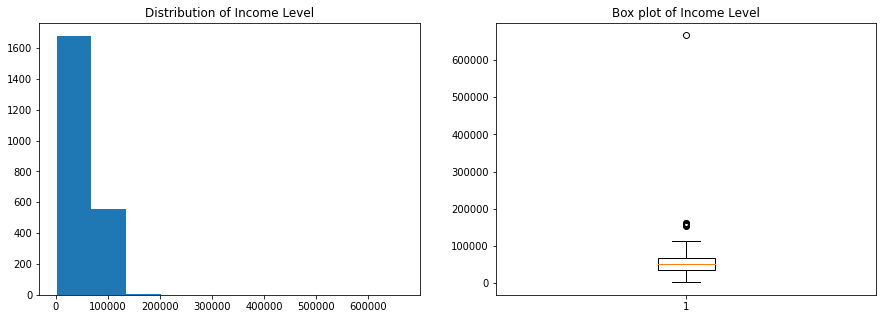

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()
ax[0].hist(cpa_df['Income'])
ax[1].boxplot(cpa_df['Income'])
ax[0].set_title('Distribution of Income Level')
ax[1].set_title('Box plot of Income Level')
plt.show()

As shown with the plots above the box plot demonstrates the influence of an outlier. The distributions will need to be corrected using log scaling to mitigate the skewing caused by the outlier.

## By Age

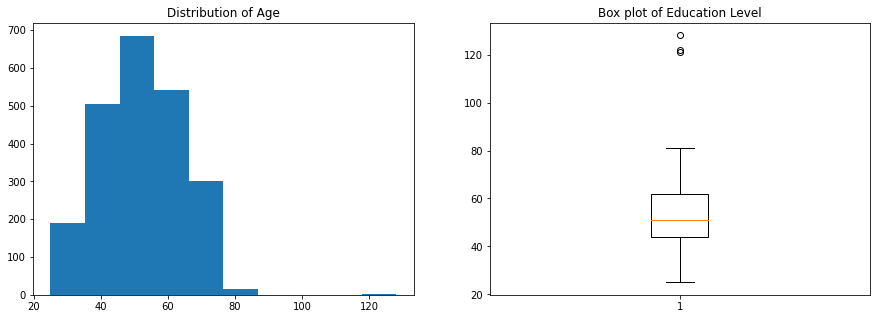

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()
ax[0].hist(cpa_df['Age'])
ax[1].boxplot(cpa_df['Age'])
ax[0].set_title('Distribution of Age')
ax[1].set_title('Box plot of Education Level')
plt.show()

In [25]:
cpa_df[cpa_df['Age'] > 100]

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Customer_Years,2year_Spend,Respond_Any,Response_Count
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7829,Master,Divorced,36640.0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,121,1,8.065753,65,False,0
11004,Master,Single,60182.0,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,128,1,7.427397,22,False,0
1150,PhD,Together,83532.0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,122,0,8.065753,1853,True,1


The Age variable is also demonstrating skewing due to 3 outliers. These observations will be removed since there has not been a documented case of any persons living beyond 122. It is highly unlikely that these customers are over 120 years of age so the observations will be removed

In [26]:
cpa_df = cpa_df[cpa_df['Age'] < 100]

__________


# Data Preprocessing   

Prior to clustering the data, pre-processing is required.


In [27]:
# Copy the dataframe
X = cpa_df.copy()

# Convert Education to ordinal
X['Education'].replace({'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}, inplace=True)

# One Hot Encode Marital Status
X = pd.concat([X, pd.get_dummies(X['Marital_Status'], 'Marital', '_')], axis=1)
X.drop(columns='Marital_Status', inplace=True)

# Log Scale Income
X['Income'] = np.log(X['Income'])

X

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Customer_Years,2year_Spend,Respond_Any,Response_Count,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,10.970575,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,9.531507,1617,True,1,0,0,1,0,0
2174,2,10.743847,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,7.213699,27,False,0,0,0,1,0,0
4141,2,11.179032,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,8.164384,776,False,0,0,0,0,1,0
6182,2,10.190394,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,7.049315,53,False,0,0,0,0,1,0
5324,4,10.973237,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,7.750685,422,False,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,2,11.022278,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,54,1,8.353425,1341,False,0,0,1,0,0,0
4001,4,11.066857,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,75,3,7.038356,444,True,1,0,0,0,1,0
7270,2,10.950473,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,40,0,7.734247,1241,True,1,1,0,0,0,0


__________


# Customer Segmentation using Clustering

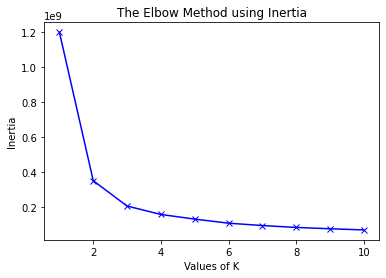

In [28]:
inertias = []
for k in range(1, 11):
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    kmeanModel.fit(X)

    inertias.append(kmeanModel.inertia_)

plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Based on the elbow method, the ideal number of clusters is 3

In [29]:
km_model = KMeans(n_clusters=3, random_state=42).fit(X)

# Append cluster assignments to dataframe
cpa_df['Cluster'] = km_model.labels_

cpa_df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Customer_Years,2year_Spend,Respond_Any,Response_Count,Cluster
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,9.531507,1617,True,1,2
2174,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,7.213699,27,False,0,0
4141,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,8.164384,776,False,0,1
6182,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,7.049315,53,False,0,0
5324,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,7.750685,422,False,0,0


## Analysis of Clusters

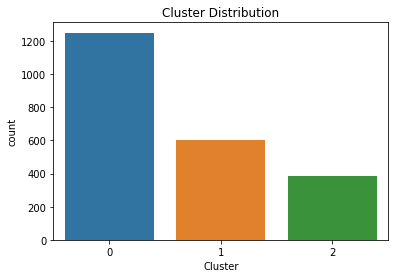

In [30]:
sns.countplot(x=cpa_df['Cluster'])
plt.title('Cluster Distribution')
plt.show()

In [31]:
cpa_df['Cluster'].value_counts()

0    1251
1     603
2     383
Name: Cluster, dtype: int64

## Cluster Centers

In [32]:
pd.DataFrame(km_model.cluster_centers_, columns=X.columns.tolist())

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Customer_Years,2year_Spend,Respond_Any,Response_Count,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow
0,2.621103,10.453739,48.782574,69.375699,6.969624,32.853717,10.336531,7.387690,21.027978,2.318145,2.684253,0.781775,3.674660,6.322942,0.067146,0.023181,0.001599,0.005596,0.003197,0.010392,0.099121,50.588329,1.228617,8.216905,147.951239,0.155875,0.199840,0.096723,0.390088,0.225420,0.260592,0.027178
1,2.691542,11.074478,48.880597,451.185738,43.260365,224.393035,62.031509,44.368159,71.087894,2.751244,6.089552,4.300166,8.600332,4.364842,0.059701,0.097844,0.044776,0.064677,0.009950,0.009950,0.117745,54.880597,0.782753,8.302937,896.326700,0.268657,0.394693,0.119403,0.381426,0.185738,0.263682,0.049751
2,2.765013,11.234371,50.509138,838.600522,62.563969,514.318538,87.736292,64.117493,76.203655,1.686684,5.516971,6.227154,8.300261,3.543081,0.112272,0.206266,0.347258,0.255875,0.052219,0.002611,0.362924,52.650131,0.308094,8.418763,1643.540470,0.655352,1.336815,0.099217,0.381201,0.240209,0.245431,0.033943


## Cluster Distributions by Demographic Variables


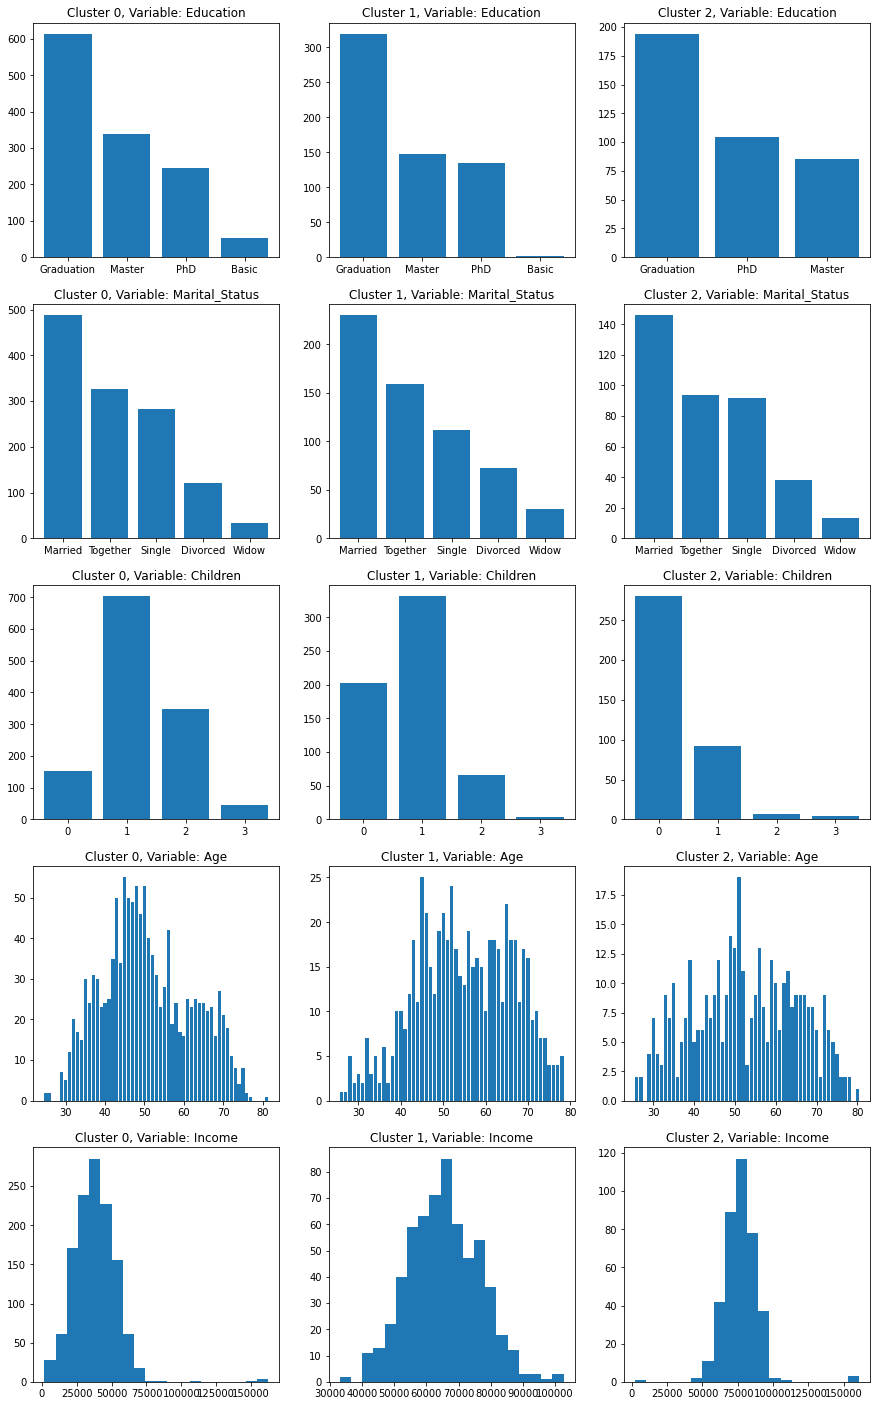

In [33]:
demo_cols = ['Education', 'Marital_Status', 'Children', 'Age']

fig, ax = plt.subplots(5, 3, figsize=(15, 25))
for i in range(3):
  for j, col in enumerate(demo_cols):
    clst = cpa_df[cpa_df['Cluster']==i][col]
    clst = clst.value_counts()
    ax[j][i].bar(clst.index, clst.values)
    ax[j][i].set_title('Cluster %d, Variable: %s' %(i, col))

# Removing Income outlier to make graph easier to read
cpa_df = cpa_df[cpa_df['Income'] < 500000]
ax[4][0].hist(cpa_df[cpa_df['Cluster']==0]['Income'], bins=20)
ax[4][0].set_title('Cluster 0, Variable: Income')
ax[4][1].hist(cpa_df[cpa_df['Cluster']==1]['Income'], bins=20)
ax[4][1].set_title('Cluster 1, Variable: Income')
ax[4][2].hist(cpa_df[cpa_df['Cluster']==2]['Income'], bins=20)
ax[4][2].set_title('Cluster 2, Variable: Income')

plt.show()

From the demographic distributions of the cluster assignments, there is a clear separation for Cluster 2. It is apparent that Cluster 2 Customers are most educated. Cluster 2 has a higher ratio of single individuals, lowest number of children and have the highest average income.

The clusters seem to have a clear delineation between socio-economic strata.  

 * Cluster 0: Has the lowest average income, has a higher number of non-college graduates, most children
 * Cluster 1: Seems to be between Cluster 0 and Cluster 2 in terms of socio-economic status.
 * Cluster 2: Appears to belong the highest socio-economic status

## Customer Behaviors by Cluster

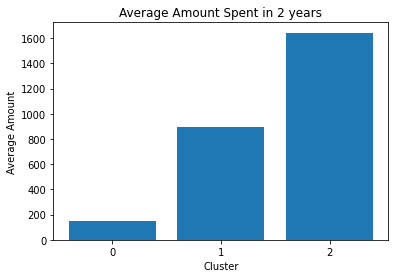

In [34]:
plt.bar(cpa_df.groupby(['Cluster']).mean().index, cpa_df.groupby(['Cluster']).mean()['2year_Spend'])
plt.title('Average Amount Spent in 2 years')
plt.xticks([0, 1, 2])
plt.xlabel('Cluster')
plt.ylabel('Average Amount')
plt.show()

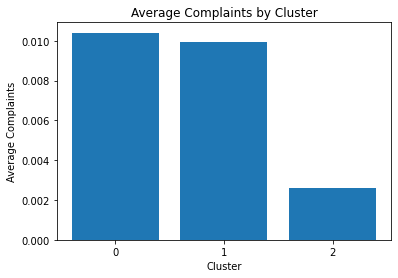

In [35]:
plt.bar(cpa_df.groupby(['Cluster']).mean().index, cpa_df.groupby(['Cluster']).mean()['Complain'])
plt.title('Average Complaints by Cluster')
plt.xticks([0, 1, 2])
plt.xlabel('Cluster')
plt.ylabel('Average Complaints')
plt.show()

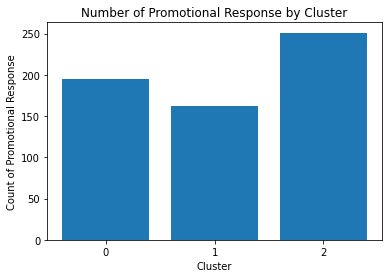

In [36]:
plt.bar(cpa_df.groupby(['Cluster']).sum().index, cpa_df.groupby(['Cluster']).sum()['Respond_Any'])
plt.title('Number of Promotional Response by Cluster')
plt.xticks([0, 1, 2])
plt.xlabel('Cluster')
plt.ylabel('Count of Promotional Response')
plt.show()

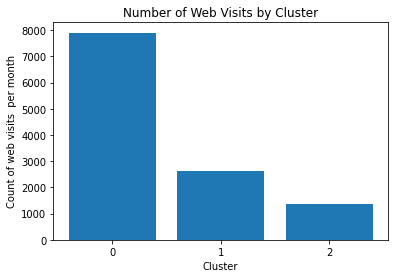

In [37]:
plt.bar(cpa_df.groupby(['Cluster']).sum().index, cpa_df.groupby(['Cluster']).sum()['NumWebVisitsMonth'])
plt.title('Number of Web Visits by Cluster')
plt.xticks([0, 1, 2])
plt.xlabel('Cluster')
plt.ylabel('Count of web visits  per month')
plt.show()

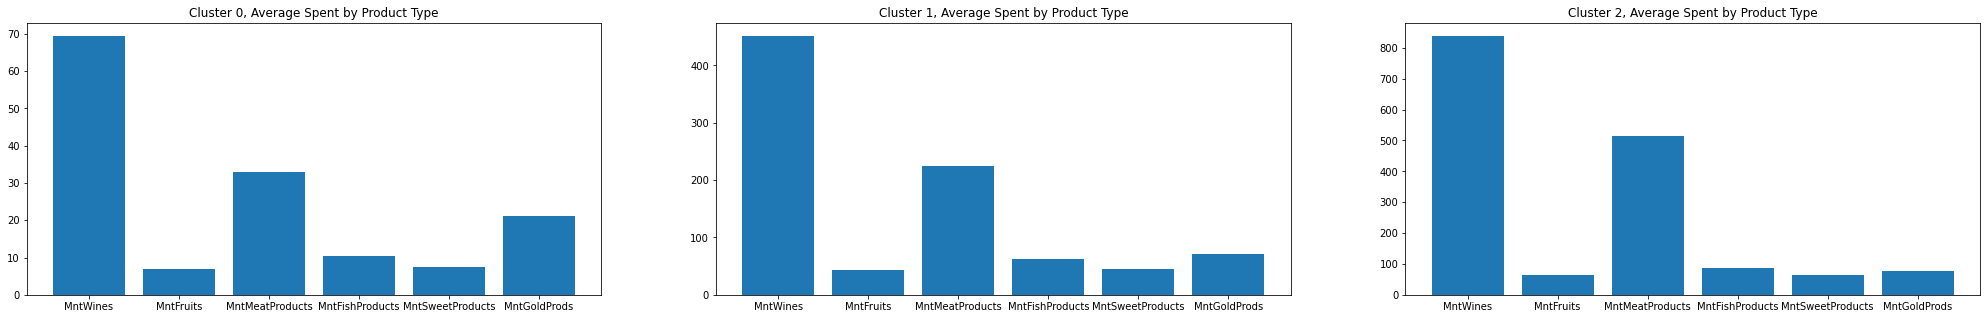

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(35, 5))
for i in range(3):
  clst = cpa_df[cpa_df['Cluster']==i][['MntWines',	'MntFruits',	
                                       'MntMeatProducts',	'MntFishProducts',	
                                       'MntSweetProducts',	'MntGoldProds']]
  clst = clst.mean()
  ax[i].bar(clst.index, clst.values)
  ax[i].set_title('Cluster %d, Average Spent by Product Type' % i)

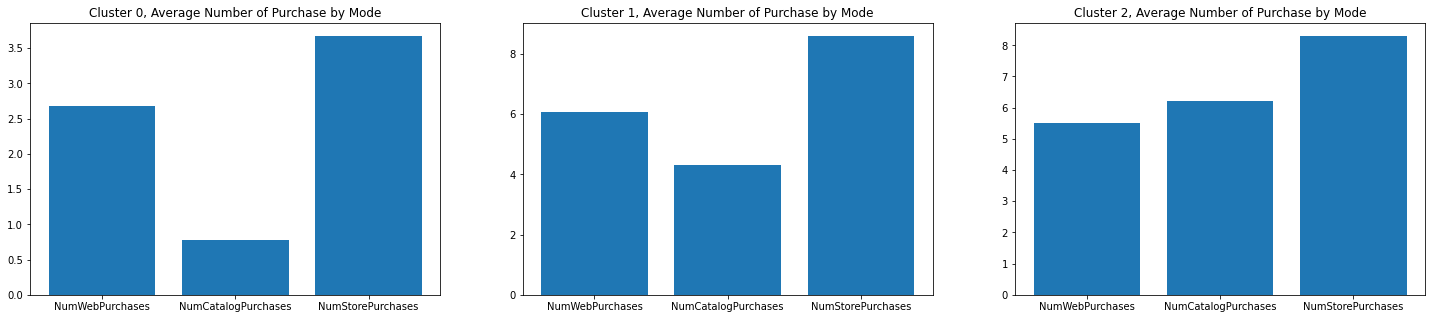

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(25, 5))
for i in range(3):
  clst = cpa_df[cpa_df['Cluster']==i][['NumWebPurchases', 'NumCatalogPurchases', 
                                       'NumStorePurchases']]
  clst = clst.mean()
  ax[i].bar(clst.index, clst.values)
  ax[i].set_title('Cluster %d, Average Number of Purchase by Mode' % i)

____________

# Results of Analysis by Cluster



It is apparent that the 3 clusters have formed, segmenting along socio-economic factors where we have clusters representing 3 tiers of socio-economic strata. Purchasing behavior around these clusters appear to support these conclusions.  

These distinct populations that have been identified by K-Means clustering can present opportunities for targeted marketing.


**Cluster 0 Summary**  

  * Represents the largest population  
  * Lowest in regards to socio-economic status
      * This cluster has the lowest average income
      * This cluster has a higher proportion of customers with below bachelor's level education.
      * This cluster has the most children with lowest occurance of no children in the household.
  * Lowest 2 year spending average
  * Highest number of complaints
  * Has comparable promotional response to Cluster 2
  * Has the highest number of web visits per month. This may be due to the size in this population
  * Has a distinct higher proportional spending to Gold Products



**Cluster 1 Summary**  

  * Represents the middle tier in regards to socio-economic status
     * Average income is between Cluster 0 and Cluster 2 
     * Has a lower proportion of customers with below bachelor's level education
     * Has lower number of children and most likely only 1 child in the household.
  * Between Cluster 0 and Cluster 2 in regards to 2 year average spending
  * Similar number of complaints compared to Cluster 0.
  * Has the lowest promotional response
  * Has a lower number of web visits per month
  * Similar proportion of purchases by product type to Cluster 0 but a significantly lower Gold purchases
  * Significantly higher purchases through catalogs than Cluster 0



**Cluster 2 Summary**  

  * Represents the highest tier in regards to socio-economic status
     * Average income is the highest 
     * All customers in this cluster are bachelor's level or above education
     * Has lower number of children.
  * Signficantly higher 2 year spending average. Signifies active spending
  * Has the lowest number of complaints
  * Has the highest promotional response
  * Has the lowest number of web visits per month
  * Purchases by product type show a higher proportion of meat products
  * Higher purchases through catalogs than Cluster 1